# -> Importação de dados gerais

In [17]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("dados_entrada_diario.xlsx")
df.head()

,producao,dia,mes,ano,semana,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,170952.0,2018-01-01,1,2018,1,NaN,NaN,NaN,NaN
1,138767.0,2018-01-02,1,2018,1,NaN,NaN,NaN,NaN
2,130747.0,2018-01-03,1,2018,1,NaN,NaN,NaN,NaN
3,123893.0,2018-01-04,1,2018,1,NaN,NaN,NaN,NaN
4,124229.0,2018-01-05,1,2018,1,NaN,NaN,NaN,NaN


Index(['producao', 'dia', 'mes', 'ano', 'semana', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')
Index(['producao'], dtype='object')


<AxesSubplot: >

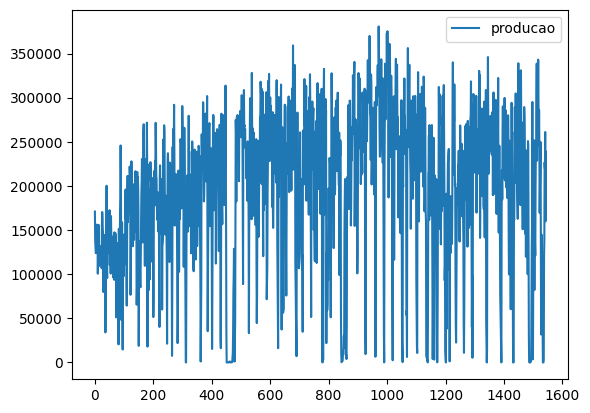

In [18]:
#drop de colunas sem utilidade
print(df.columns)
df['producao'] = pd.to_numeric(df['producao'])
#os dados nulos não podem ser desconsiderados -> apenas execução de testes
df.drop(df[df['producao'] == 0].index, inplace=True)
df.drop('Unnamed: 5', axis=1, inplace=True) 
df.drop('Unnamed: 6', axis=1, inplace=True) 
df.drop('Unnamed: 7', axis=1, inplace=True) 
df.drop('Unnamed: 8', axis=1, inplace=True) 
df.drop('semana', axis=1, inplace=True) 
df.drop('ano', axis=1, inplace=True) 
df.drop('mes', axis=1, inplace=True)
# df['dia'] = pd.to_datetime(df['dia'])
df.drop('dia', axis=1, inplace=True)
#os dados nulos não podem ser desconsiderados
df.dropna(inplace=True)
print(df.columns)

df.plot()

# -> Definição de bases de treino e teste

<AxesSubplot: >

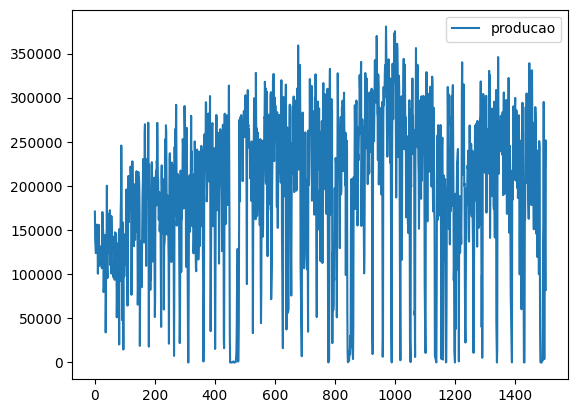

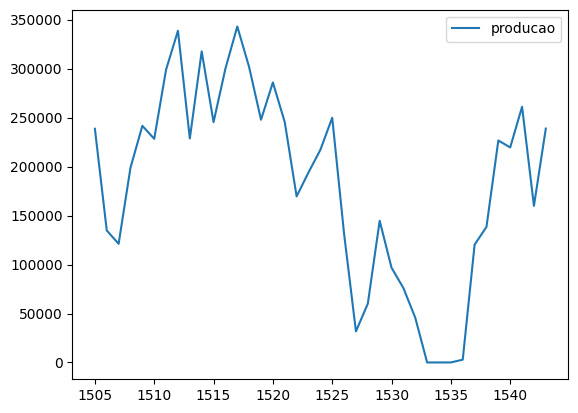

In [19]:
msk = (df.index < len(df)-10)
df_train = df[msk].copy()
df_test = df[~msk].copy()
df_train.plot()
df_test.plot()

c:\Users\leona\OneDrive\Área de Trabalho\Coding\DataScienceMBAUSP-main\DataScienceMBAUSP-main\venv\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


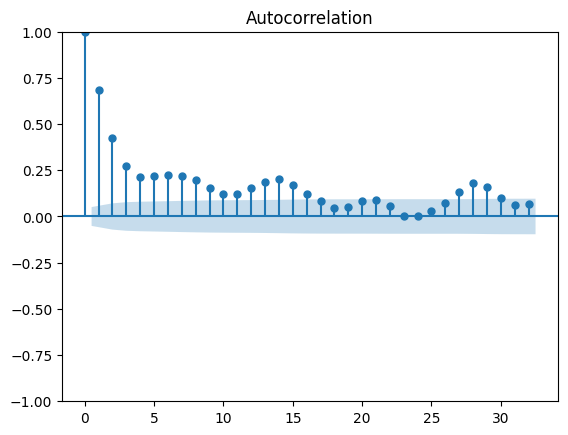

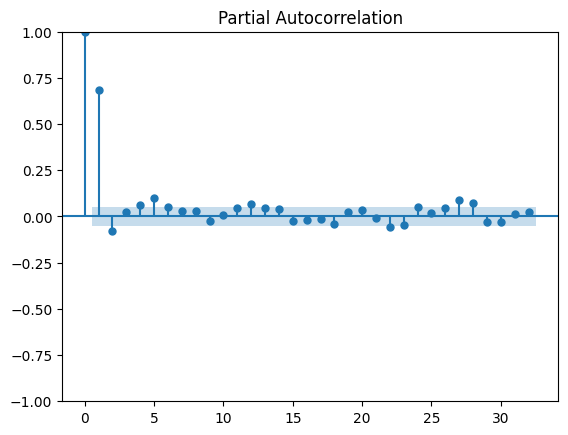

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

In [21]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
#print(adf_test)

<AxesSubplot: >

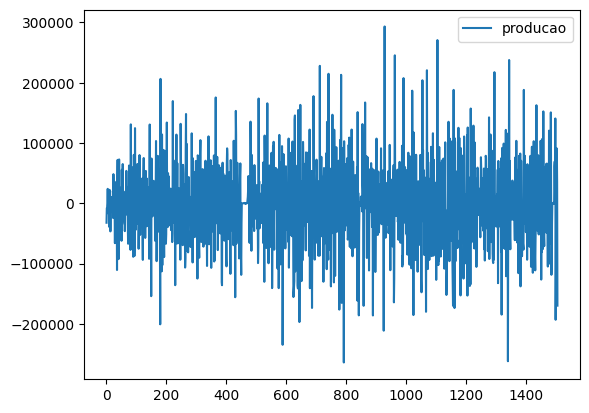

In [22]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

c:\Users\leona\OneDrive\Área de Trabalho\Coding\DataScienceMBAUSP-main\DataScienceMBAUSP-main\venv\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


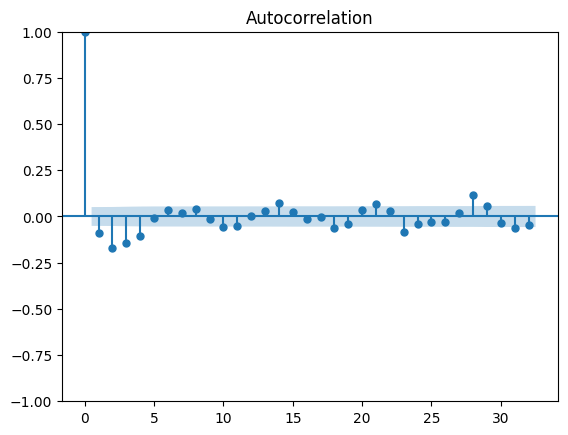

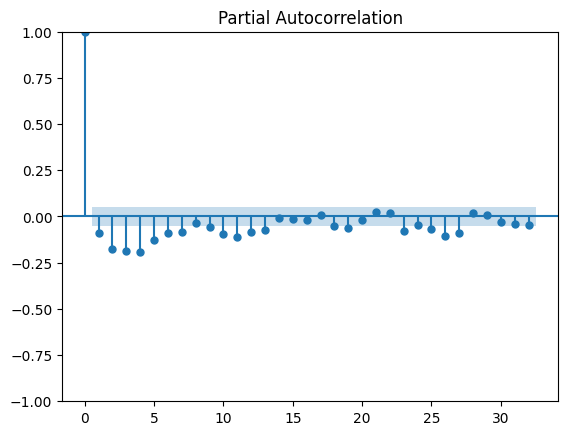

In [23]:
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)

In [24]:
adf_test = adfuller(df_train_diff)
print(f'p-value = {adf_test[1]}')

p-value = 2.8556759040071565e-21


In [25]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\leona\OneDrive\Área de Trabalho\Coding\DataScienceMBAUSP-main\DataScienceMBAUSP-main\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leona\OneDrive\Área de Trabalho\Coding\DataScienceMBAUSP-main\DataScienceMBAUSP-main\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leona\OneDrive\Área de Trabalho\Coding\DataScienceMBAUSP-main\DataScienceMBAUSP-main\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               producao   No. Observations:                 1515
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -18912.095
Date:                Sun, 05 Feb 2023   AIC                          37830.191
Time:                        17:49:15   BIC                          37846.158
Sample:                             0   HQIC                         37836.137
                               - 1515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1125      0.024     -4.746      0.000      -0.159      -0.066
ar.L2         -0.1731      0.024     -7.309      0.000      -0.220      -0.127
sigma2       4.15e+09   7.63e-13   5.44e+21      0.0

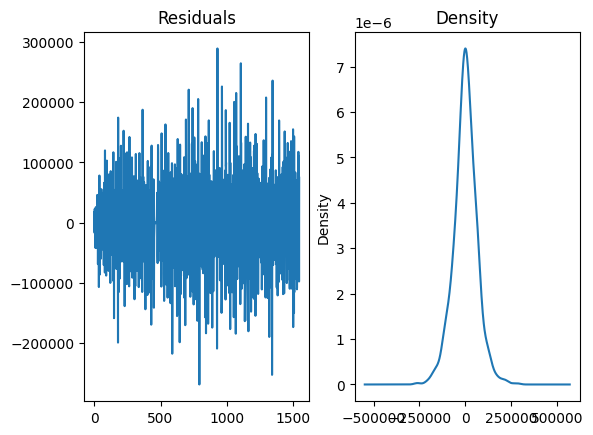

In [26]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

c:\Users\leona\OneDrive\Área de Trabalho\Coding\DataScienceMBAUSP-main\DataScienceMBAUSP-main\venv\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


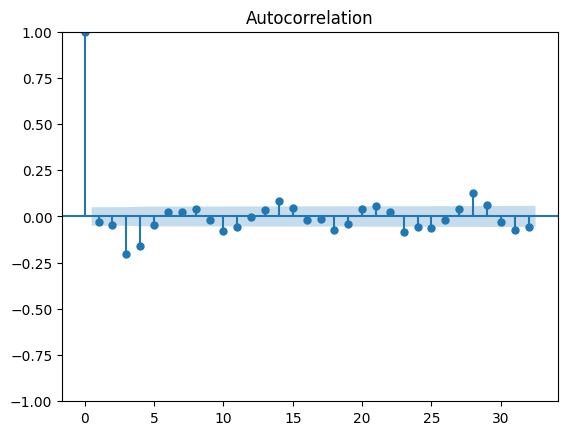

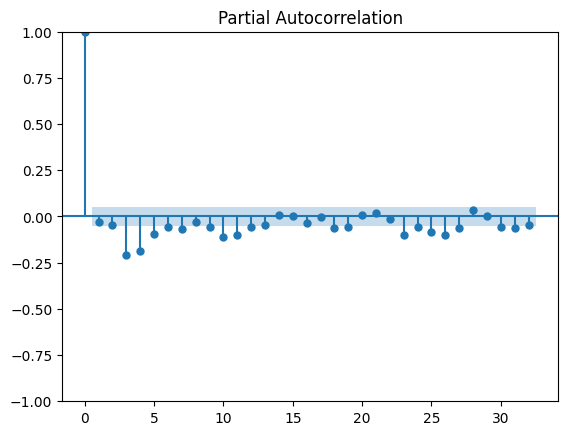

In [27]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

c:\Users\leona\OneDrive\Área de Trabalho\Coding\DataScienceMBAUSP-main\DataScienceMBAUSP-main\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot: >

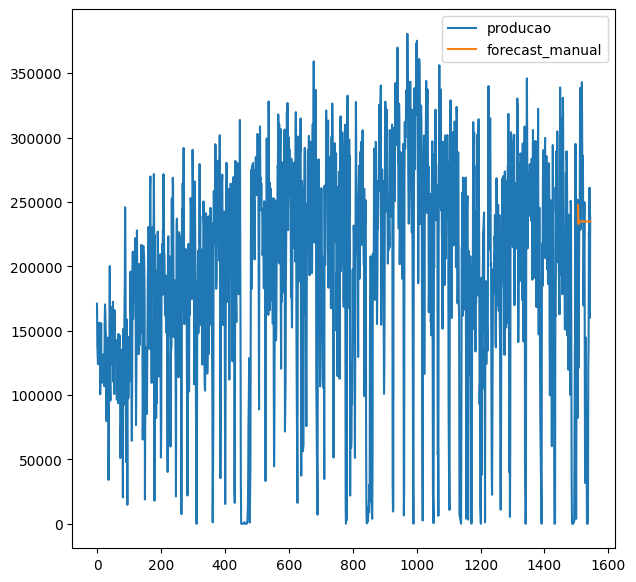

In [28]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)


df.plot(figsize=(7,7))